In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train[0].shape

(28, 28)

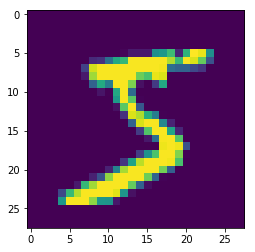

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train[0].shape

(28, 28, 1)

In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255
x_test = x_test/255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(16, (5, 5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          51264     
__________

In [9]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
model_history=model.fit(x_train, y_train, batch_size=200, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 52s 870us/step - loss: 0.3091 - acc: 0.9022
Epoch 2/10
60000/60000 [==============================] - 50s 827us/step - loss: 0.0702 - acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 50s 829us/step - loss: 0.0447 - acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 50s 830us/step - loss: 0.0334 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 50s 831us/step - loss: 0.0263 - acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 50s 834us/step - loss: 0.0234 - acc: 0.9925
Epoch 7/10
60000/60000 [==============================] - 50s 830us/step - loss: 0.0182 - acc: 0.9943
Epoch 8/10
60000/60000 [==============================] - 50s 830us/step - loss: 0.0158 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 50s 835us/step - loss: 0.0130 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 50s 838us/step - loss: 

No handles with labels found to put in legend.


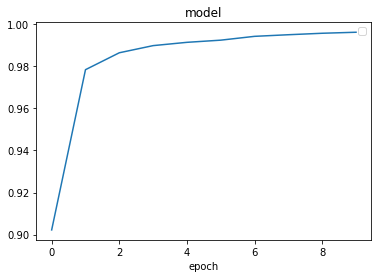

In [10]:
plt.plot(model_history.history["acc"])

plt.title("model")
plt.xlabel("epoch")
plt.legend(loc = "best")
plt.show()

No handles with labels found to put in legend.


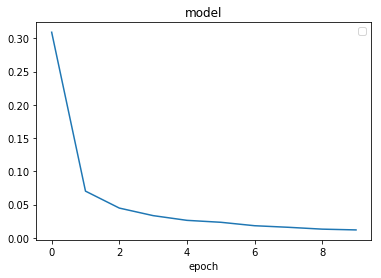

In [11]:
plt.plot(model_history.history["loss"])
plt.title("model")
plt.xlabel("epoch")
plt.legend(loc = "best")
plt.show()

In [12]:
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

10000/10000 [==============================] - 3s 330us/step
測試資料的 loss: 0.02912
測試資料的正確率: 0.9914


In [13]:
model.save('homeworkCNNmodel.h5')

In [14]:
del model

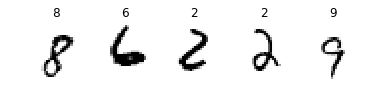

In [16]:
from keras.models import load_model
model = load_model('homeworkCNNmodel.h5')
predict = model.predict_classes(x_test)
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")